# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('yulu_rental.csv')

1. Як погодні умови впливають на попит на оренду велосипедів?

In [4]:
weather_conditions = {
    1: 'Ясно/Мало хмарно',
    2: 'Туман/Хмарно',
    3: 'Легкий дощ/Гроза',
    4: 'Сильний дощ/Сніг'
}

df['weather'] = df['weather'].map(weather_conditions)

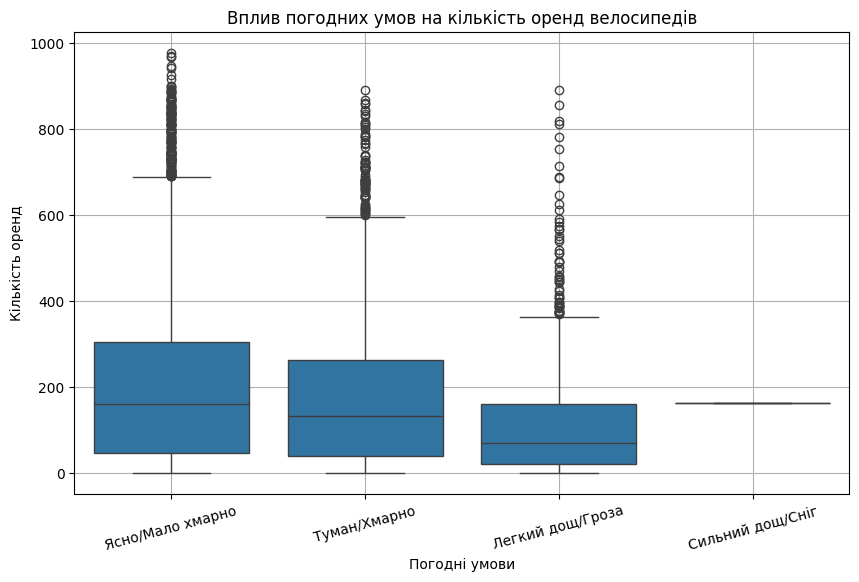

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weather', y='count')
plt.title('Вплив погодних умов на кількість оренд велосипедів')
plt.xlabel('Погодні умови')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=15)
plt.grid(True)

2. Як пов'язані між собою температура та вологість за різної погоди?

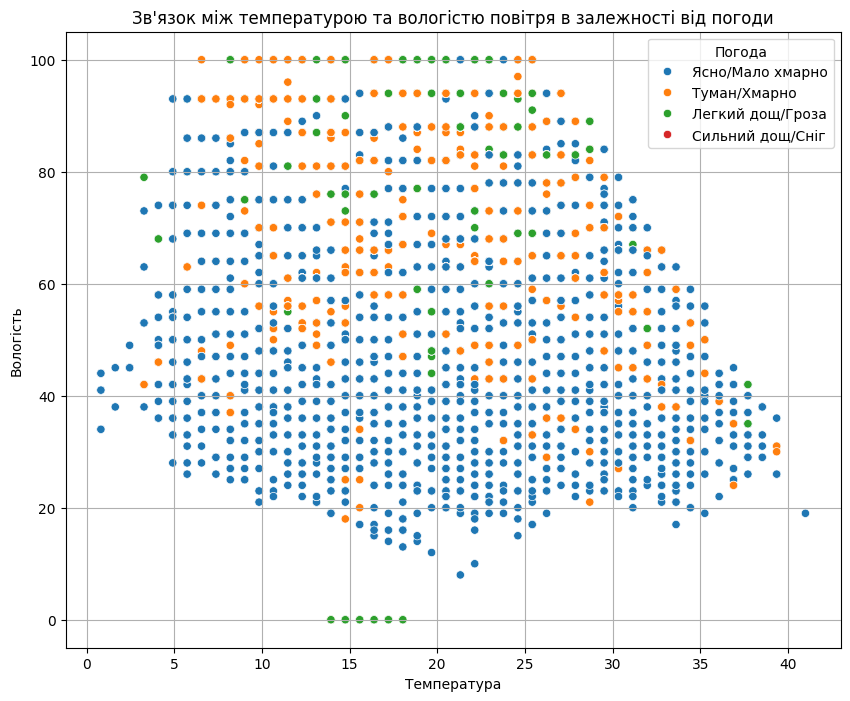

In [6]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='temp', y='humidity', hue='weather')

plt.title('Зв\'язок між температурою та вологістю повітря в залежності від погоди')
plt.xlabel('Температура')
plt.ylabel('Вологість')
plt.legend(title='Погода')
plt.grid(True)

3. Середня температура за різної пори року

In [92]:
df_temp_mean = df_temp.groupby('season')['temp'].mean().reset_index()
df_temp_mean

,season,temp
0,1,12.530491
1,2,22.823483
2,3,28.789111
3,4,16.649239


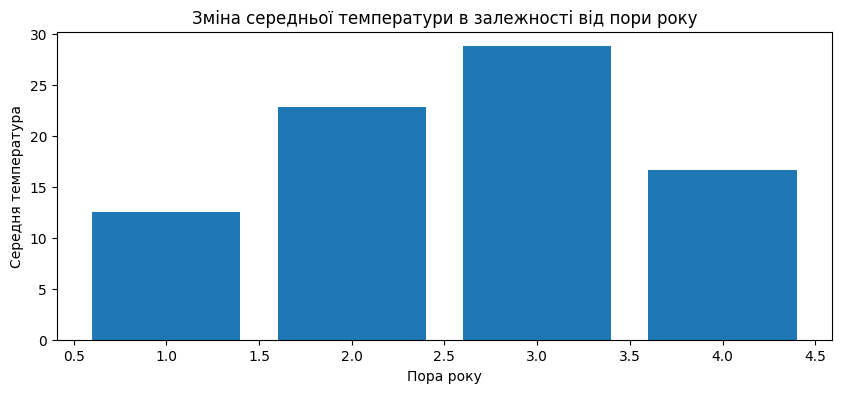

In [93]:
plt.figure(figsize=(10,4))
plt.bar(df_temp_mean['season'], df_temp_mean['temp'])
plt.title('Зміна середньої температури в залежності від пори року')
plt.xlabel('Пора року')
plt.ylabel('Середня температура')
plt.show();